# **Sales Prediction Model**
## *Sylvia Pérez Montero*


## **Project Summary**

### **Objective**
> Develop a predictive model to predict sales.
> 
### **Scope**
> A thorough understanding of an establishment's sales is critical to its success, as its impact reaches all areas of the organization (inventory, resource/employee allocation, marketing and advertising strategies, new product development, pricing and sales strategies, to name a few). And being able to predict sales raises decision making in all these areas to another level.
>
> This project uses python to evaluate various machine learning models, select the optimal one for the dataset provided and predicts sales based on it.
> 
### **Implementation**

> Python will be the primary tool for the development and implementation of the best predictive model for sales. Models such as linear regression, random forest, neural network, etc. will be employed.

### **Outcome**
> A robust predictive model that will enable the organization to make data-driven decisions, including but not limited to, operational efficiency, resource allocation, and marketing and advertising strategies.
>

## **Problem Statement**
> In today's dynamic marketplace, being able to stay ahead of the competition is more important than ever. Brands need to anticipate sales in a methodic and consistent manner, and with consistent maintenance and optimization, to drive decision-making across their entire organizations.
>
## **Approach**
> This project will use Python's machine learning capabilities along with predictive modeling techniques to create a robust predictive model for sales.
>


## **Becoming Acquainted with the Data**


In [5]:
# Imports the necessary libraries

import pandas as pd
import numpy as np
import joblib

# Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

# Modeling Libraries
from sklearn.linear_model import LinearRegression
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# About Keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# More Visualizations 
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Managing Warnings
import warnings
warnings.filterwarnings('ignore')


## **Data Preparation and Cleaning**

In [8]:
# Makes sure all the work from this file is performed in the correct folder
import os

# Define the target directory
target_directory = "/Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/Training & Model Definition/"

# Change the working directory
try:
    os.chdir(target_directory)
    print(f"Working directory changed to: {os.getcwd()}")
except FileNotFoundError:
    raise FileNotFoundError(f"The directory {target_directory} does not exist.")
except PermissionError:
    raise PermissionError(f"Permission denied to access {target_directory}.")

Working directory changed to: /Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/Training & Model Definition


In [10]:
# Loads the Dataset
file_path = '/Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/Training & Model Definition/sales.csv' 
data = pd.read_csv(file_path)

# Displays the column names and the top 5 rows of data
data.head()

# Checks the number of rows and columns
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

# Dataset Information
data.info()

# Looks for duplicate records
dups = data.duplicated().sum()
print(f'There are {dups} duplicated rows in the data')

# Counts missing/null values
data.isnull().sum()

# Looks at the columns
data.columns

# Removes the Unnamed: 0 and store_id columns (no longer needed)
data.drop(['Unnamed: 0', 'store_ID'], axis=1, inplace=True)
%store data

# Displays the headings of the updated dataframe for verification
data.head()
data.info()

# Presents the unique values in all columns except the sales column

# Columns to check for unique values
columns_to_check = ['day_of_week', 'date', 'nb_customers_on_day','open', 'promotion', 'state_holiday', 'school_holiday']

# Iterate over the columns and display unique value counts
for column in columns_to_check:
    if column in data.columns:
        unique_values = data[column].unique()
        num_unique_values = data[column].nunique()
        print(f"No. of unique values in {column} is {num_unique_values}")
        print(f"Unique values in {column}: {unique_values}\n")
    else:
        print(f"Column '{column}' not found in the DataFrame.\n")

# Recodes unique values in state_holiday and day_of_week
# Recode values 'a', 'b', 'c', 'd' in 'state_holiday' as 1
state_holiday_mapping = {'a': 1, 'b': 1, 'c': 1, 'd': 1, '0': 0}
data['state_holiday'] = data['state_holiday'].replace(state_holiday_mapping)

# Displays the first few rows to verify the changes
#print("Updated 'state_holiday' column:")
print(data['state_holiday'].unique())
data.head()

# Calculates summary statistics for the numerical values before proceeding
# Select the columns of interest
columns_of_interest = ['sales', 'nb_customers_on_day']

# Generate summary statistics
summary_statistics = data[columns_of_interest].describe()

# Display the summary statistics
print("Summary Statistics for 'sales' and 'nb_customers_on_day':")
print(summary_statistics)


# Feature Engineering
# Extracts month from the date column
data['month'] = pd.to_datetime(data['date']).dt.month

# Changes data types for month and day_of_week to object
data['month'] = data['month'].astype(str)
data['day_of_week'] = data['day_of_week'].astype(str)

#data.drop(['date'], axis=1, inplace=True)
%store data

# Displays the headings of the updated dataframe for verification
data.head()
data.info()

# Defines the new column order
new_column_order = ['day_of_week', 'date', 'nb_customers_on_day', 'open', 
                    'promotion', 'state_holiday', 'school_holiday', 'month', 'sales']

# Reorders the dataframe columns
data = data[new_column_order]

# Stores the reordered dataframe
%store data

# Verifies the new column order
print(data.head())
print(data.info())

print(data.columns)


Number of rows are:  640840
Number of columns are:  10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB
There are 0 duplicated rows in the data
Stored 'data' (DataFrame)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 8 columns):
 #   Co

In [11]:
# Encodes month and day_of_week variables using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the 'day_of_week' and 'month' columns
encoded_data = pd.get_dummies(data, columns=['day_of_week', 'month'], drop_first=False)

# Drops the date column (no longer needed)
encoded_data.drop(['date'], axis=1, inplace=True)
%store data

# Displays the headings of the updated dataframe for verification
encoded_data.head()
encoded_data.info()

# Save the DataFrame 'encoded_data' to a CSV file
encoded_data.to_csv("encoded_data.csv", index=False)

# Confirm the file has been saved
print("Encoded data saved as encoded_data.csv")

Stored 'data' (DataFrame)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   nb_customers_on_day  640840 non-null  int64
 1   open                 640840 non-null  int64
 2   promotion            640840 non-null  int64
 3   state_holiday        640840 non-null  int64
 4   school_holiday       640840 non-null  int64
 5   sales                640840 non-null  int64
 6   day_of_week_1        640840 non-null  bool 
 7   day_of_week_2        640840 non-null  bool 
 8   day_of_week_3        640840 non-null  bool 
 9   day_of_week_4        640840 non-null  bool 
 10  day_of_week_5        640840 non-null  bool 
 11  day_of_week_6        640840 non-null  bool 
 12  day_of_week_7        640840 non-null  bool 
 13  month_1              640840 non-null  bool 
 14  month_10             640840 non-null  bool 
 15  month_11             6408

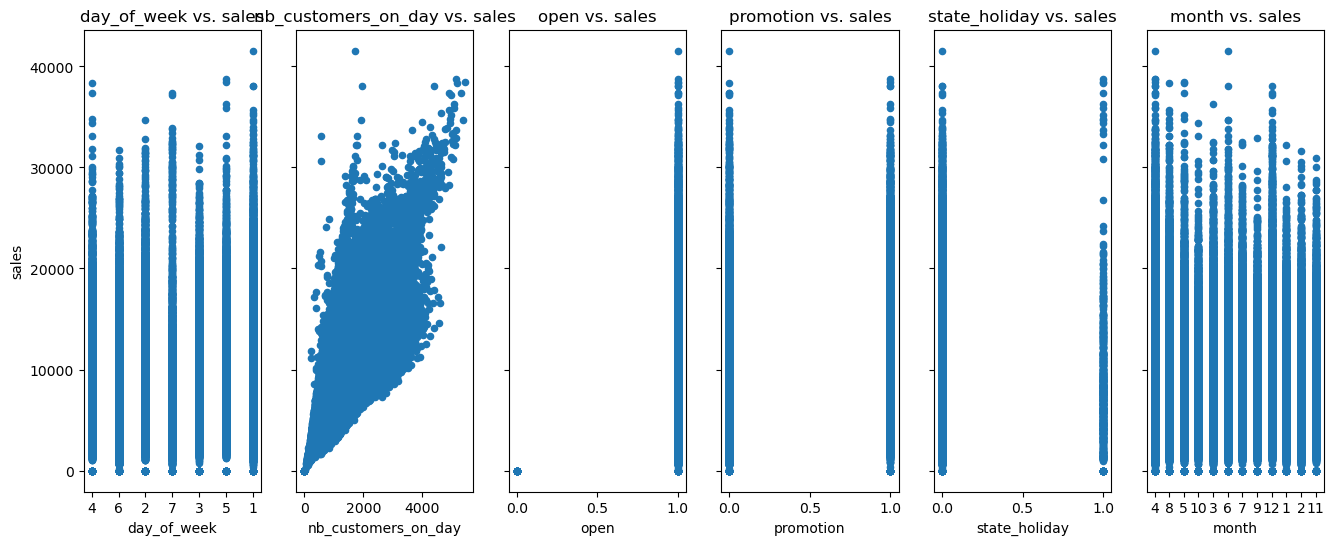

In [13]:
# Visualizes relationships between columns
fig, axs = plt.subplots(1, 6, sharey=True, figsize=(16, 6))

# Scatter plot for day_of_week vs. sales
data.plot(kind="scatter", x='day_of_week', y='sales', ax=axs[0])
axs[0].set_title('day_of_week vs. sales')
axs[0].set_xlabel('day_of_week')
axs[0].set_ylabel('sales')

# Scatter plot for nb_customers_on_day vs. sales
data.plot(kind="scatter", x='nb_customers_on_day', y='sales', ax=axs[1])
axs[1].set_title('nb_customers_on_day vs. sales')
axs[1].set_xlabel('nb_customers_on_day')
axs[1].set_ylabel('sales')

# Scatter plot for open vs. sales
data.plot(kind="scatter", x='open', y='sales', ax=axs[2])
axs[2].set_title('open vs. sales')
axs[2].set_xlabel('open')
axs[2].set_ylabel('sales')

# Scatter plot for promotion vs. sales
data.plot(kind="scatter", x='promotion', y='sales', ax=axs[3])
axs[3].set_title('promotion vs. sales')
axs[3].set_xlabel('promotion')
axs[3].set_ylabel('sales')

# Scatter plot for state_holiday vs. sales
data.plot(kind="scatter", x='state_holiday', y='sales', ax=axs[4])
axs[4].set_title('state_holiday vs. sales')
axs[4].set_xlabel('state_holiday')
axs[4].set_ylabel('sales')

# Scatter plot for school_holiday vs. sales
data.plot(kind="scatter", x='school_holiday', y='sales', ax=axs[5])
axs[5].set_title('school_holiday vs. sales')
axs[5].set_xlabel('school_holiday')
axs[5].set_ylabel('sales')

# Scatter plot for month vs. sales
data.plot(kind="scatter", x='month', y='sales', ax=axs[5])
axs[5].set_title('month vs. sales')
axs[5].set_xlabel('month')
axs[5].set_ylabel('sales')
# Displays the plots
plt.show()

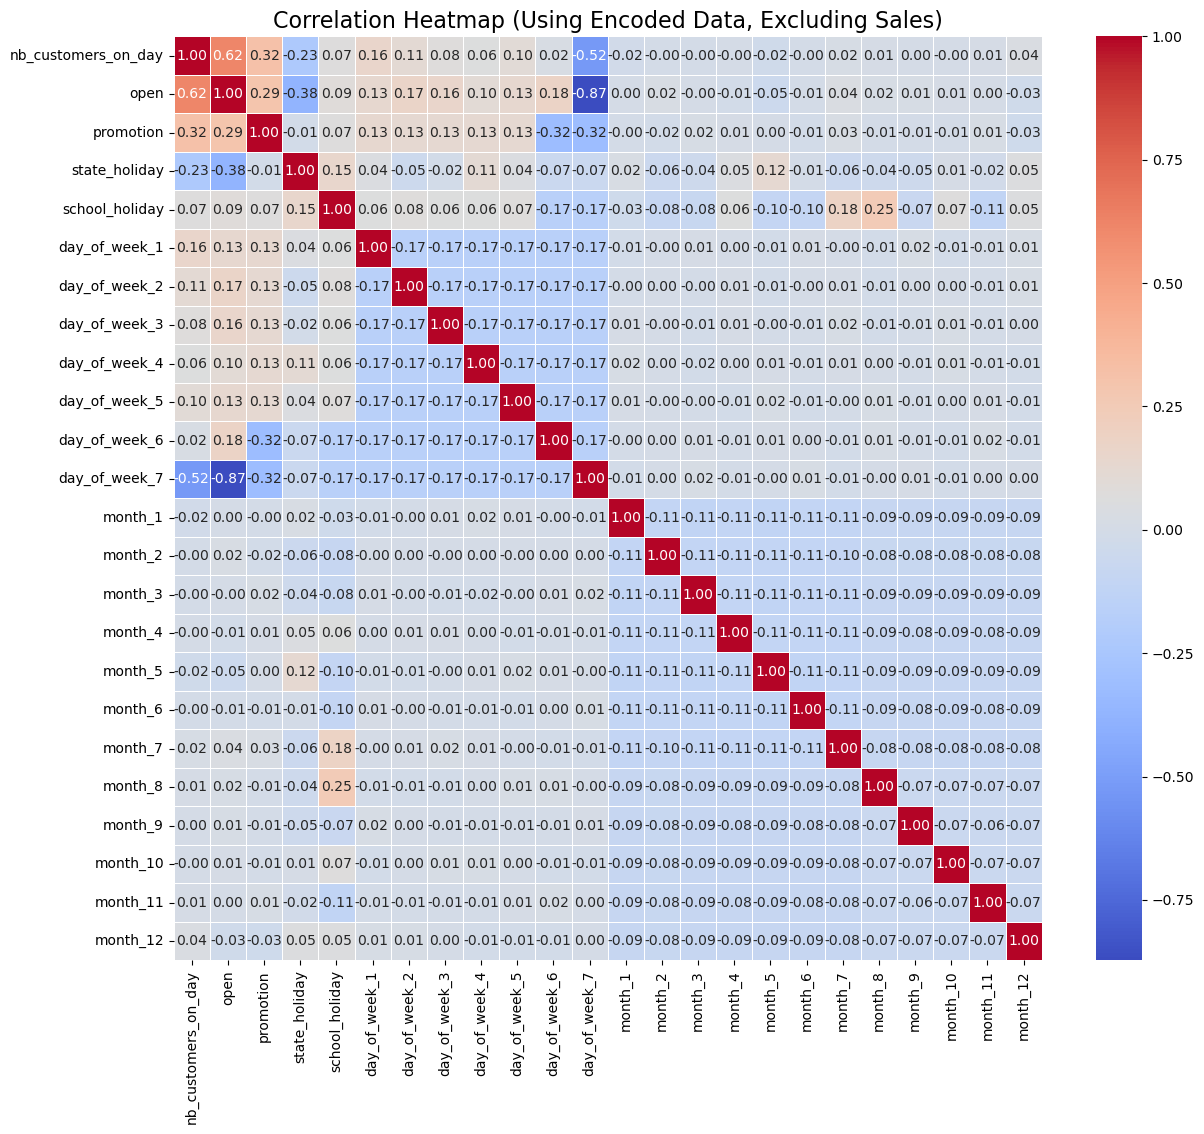

In [14]:
# Generates a correlation heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selects all columns except 'sales' from encoded_data
correlation_columns = [
    'nb_customers_on_day', 'open', 'promotion', 'state_holiday', 'school_holiday',
    'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
    'day_of_week_5', 'day_of_week_6', 'day_of_week_7',
    'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
    'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'
]

# Calculates the correlation matrix using encoded_data
correlation_matrix = encoded_data[correlation_columns].corr()

# Creates a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Adds titles and labels
plt.title("Correlation Heatmap (Using Encoded Data, Excluding Sales)", fontsize=16)
plt.show()

In [16]:
# Makes sure X and y are defined from the encoded_data dataframe
X = encoded_data.drop(columns=['sales'])  # All columns except the target
y = encoded_data['sales']  # Target column

# Splits the data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Prints dataset sizes to verify the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 384504 samples
Validation set size: 128168 samples
Test set size: 128168 samples


In [17]:
# Imports additional libraries
from sklearn.feature_selection import SelectKBest, f_regression

# Feature optimization: SelectKBest (statistical method) for feature selection
print("Performing Feature Selection...")

# Defines X_train and y_train, and ensures they are aligned with the dataframe 'data'
k = min(5, X_train.shape[1])  
selector = SelectKBest(score_func=f_regression, k=k)

# Fits the selector on the training data 
selector.fit(X_train,y_train)

# Transforms training, validation and test sets
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Gets the indices of the selected features
selected_features = selector.get_support(indices=True)
print(f"Selected Feature Indices: {selected_features}")

# Gets the column names for the selected features
selected_column_names = X.columns[selected_features]
print(f"Selected Column Names: {selected_column_names}")

# Converts the transformed data back into dataframe (for better readability)
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features)
X_val_selected_df = pd.DataFrame(X_val_selected, columns=selected_features)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features)

# Print the sizes of the datasets
print(f"Training set size: {X_train_selected.shape[0]} samples")
print(f"Validation set size: {X_val_selected.shape[0]} samples")
print(f"Test set size: {X_test_selected.shape[0]} samples")

Performing Feature Selection...
Selected Feature Indices: [ 0  1  2  3 11]
Selected Column Names: Index(['nb_customers_on_day', 'open', 'promotion', 'state_holiday',
       'day_of_week_7'],
      dtype='object')
Training set size: 384504 samples
Validation set size: 128168 samples
Test set size: 128168 samples


In [19]:
# Creates a new dataset with only the selected columns and the target
# The rest of the columns will not be considered from this point forward, to reduce noise and processing time
# The encoded_data file with the entire clean dataset will be maintained in case I return to doing further optimization or feature engineering 
selected_columns = selected_column_names.tolist() + ['sales']
optimized_data = encoded_data[selected_columns]

# Saves the optimized dataset
optimized_data.to_csv("optimized_data.csv", index=False)

print("Optimized dataset created with selected features and target.")

optimized_data.head()

Optimized dataset created with selected features and target.


,nb_customers_on_day,open,promotion,state_holiday,day_of_week_7,sales
0,517,1,0,0,False,4422
1,694,1,0,0,False,8297
2,970,1,1,0,False,9729
3,473,1,1,0,False,6513
4,1068,1,1,0,False,10882


In [24]:
# Features Scaling

#Initializes the scaler
scaler = StandardScaler()

# Fits the scaler on the training data and transform all datasets
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Save the fitted scaler for future use
scaler_filename = "/Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

# Initializes a dataframe to store performance metrics
results = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R²'])

# Defines a function to evaluate a model
# Updated evaluate_model function to include validation set
def evaluate_model(model, model_name, X_train, X_val, y_train, y_val, X_test=None, y_test=None):
    # Train the model
    model.fit(X_train, y_train)

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    print(f"{model_name} - Validation Set - MSE: {val_mse:.2f}, MAE: {val_mae:.2f}, R²: {val_r2:.2f}")

    # Evaluate on the test set if provided
    if X_test is not None and y_test is not None:
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        print(f"{model_name} - Test Set - MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")
    else:
        test_mse, test_mae, test_r2 = None, None, None

    # Combine results into a DataFrame
    results_df = pd.DataFrame({
        'Model': [model_name],
        'Validation_MSE': [val_mse],
        'Validation_MAE': [val_mae],
        'Validation_R²': [val_r2],
        'Test_MSE': [test_mse],
        'Test_MAE': [test_mae],
        'Test_R²': [test_r2]
    })

    return results_df

Scaler saved to /Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/scaler.pkl


In [26]:
# Model #1 - Linear Regression
print("Evaluating Linear Regression...")
lr_model = LinearRegression()

# Evaluate the model using training, validation, and test sets
result = evaluate_model(
    lr_model,
    "Linear Regression",
    X_train,  # Training features
    X_val,    # Validation features
    y_train,  # Training target
    y_val,    # Validation target
    X_test,   # Test features
    y_test    # Test target
)

# Append results to the results DataFrame
results = pd.concat([results, result], ignore_index=True)

# Display results
print("Results:")
print(results)

Evaluating Linear Regression...
Linear Regression - Validation Set - MSE: 2057116.88, MAE: 972.19, R²: 0.86
Linear Regression - Test Set - MSE: 2097469.54, MAE: 976.98, R²: 0.86
Results:
               Model  MSE  MAE   R²  Validation_MSE  Validation_MAE  \
0  Linear Regression  NaN  NaN  NaN    2.057117e+06      972.193417   

   Validation_R²      Test_MSE    Test_MAE   Test_R²  
0       0.860538  2.097470e+06  976.984191  0.858103  


In [30]:
# Model 2 - Polynomial Regression
degree = 2
print(f"Evaluating Polynomial Regression (degree {degree})...")

# Creates the polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

# Transforms fit on training data, transforms both the validation and test sets
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)  # Transform validation set
X_test_poly = poly_features.transform(X_test)  # Transform test set

# Initializes the model
poly_model = LinearRegression()

# Evaluates the model using the 3 sets
result = evaluate_model(
    poly_model,
    f"Polynomial Regression (degree {degree})",
    X_train_poly,  # Transformed training data
    X_val_poly,    # Transformed validation data
    y_train,       # Training target
    y_val,         # Validation target
    X_test_poly,   # Transformed test data
    y_test         # Test target
)

# Append results to the results DataFrame
results = pd.concat([results, result], ignore_index=True)

# Display the results
print("Results:")
print(results)

Evaluating Polynomial Regression (degree 2)...
Polynomial Regression (degree 2) - Validation Set - MSE: 1811217.38, MAE: 891.73, R²: 0.88
Polynomial Regression (degree 2) - Test Set - MSE: 1817788.15, MAE: 892.27, R²: 0.88
Results:
                              Model  MSE  MAE   R²  Validation_MSE  \
0                 Linear Regression  NaN  NaN  NaN    2.057117e+06   
1  Polynomial Regression (degree 2)  NaN  NaN  NaN    1.811217e+06   

   Validation_MAE  Validation_R²      Test_MSE    Test_MAE   Test_R²  
0      972.193417       0.860538  2.097470e+06  976.984191  0.858103  
1      891.729333       0.877209  1.817788e+06  892.268361  0.877024  


In [31]:
# Model 3 - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameter grid
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10]}

# Initialize GridSearchCV
rf_model = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=2,  # Cross-validation folds
    n_jobs=-1
)

print("Training and evaluating Random Forest Regressor...")

# Fit GridSearchCV on the training set
rf_model.fit(X_train, y_train)

# Retrieve the best estimator from GridSearchCV
best_rf_model = rf_model.best_estimator_

# Evaluate the best model on the validation and test sets
result = evaluate_model(
    best_rf_model,  # Use the best model identified by GridSearchCV
    "Random Forest Regressor",
    X_train,  # Training data
    X_val,    # Validation data
    y_train,  # Training target
    y_val,    # Validation target
    X_test,   # Test data
    y_test    # Test target
)

# Append results to the results DataFrame
results = pd.concat([results, result], ignore_index=True)

# Display the results
print("Results:")
print(results)

Training and evaluating Random Forest Regressor...
Random Forest Regressor - Validation Set - MSE: 1765830.43, MAE: 878.23, R²: 0.88
Random Forest Regressor - Test Set - MSE: 1797407.41, MAE: 881.37, R²: 0.88
Results:
                              Model  MSE  MAE   R²  Validation_MSE  \
0                 Linear Regression  NaN  NaN  NaN    2.057117e+06   
1  Polynomial Regression (degree 2)  NaN  NaN  NaN    1.811217e+06   
2           Random Forest Regressor  NaN  NaN  NaN    1.765830e+06   

   Validation_MAE  Validation_R²      Test_MSE    Test_MAE   Test_R²  
0      972.193417       0.860538  2.097470e+06  976.984191  0.858103  
1      891.729333       0.877209  1.817788e+06  892.268361  0.877024  
2      878.232675       0.880286  1.797407e+06  881.374370  0.878403  


In [43]:
# Model 4 - Gradient Boosting Regressor

# Defines the evaluation function
def evaluate_model(model, model_name, X_train, X_val, y_train, y_val, X_test=None, y_test=None):
    """
    Trains a model, evaluates it on validation and test datasets, and returns a DataFrame with the results.

    Parameters:
        model: The machine learning model to be evaluated.
        model_name: Name of the model (string).
        X_train, X_val: Feature sets for training and validation.
        y_train, y_val: Target sets for training and validation.
        X_test, y_test: (Optional) Feature and target sets for testing.

    Returns:
        A pandas DataFrame with evaluation metrics for the validation and test datasets.
    """
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Evaluate on the validation set
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    print(f"{model_name} - Validation Set - MSE: {val_mse:.2f}, MAE: {val_mae:.2f}, R²: {val_r2:.2f}")

    test_mse, test_mae, test_r2 = None, None, None
    if X_test is not None and y_test is not None:
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        print(f"{model_name} - Test Set - MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

    # Combines results into a DataFrame
    results_df = pd.DataFrame({
        'Model': [model_name],
        'Validation_MSE': [val_mse],
        'Validation_MAE': [val_mae],
        'Validation_R²': [val_r2],
        'Test_MSE': [test_mse],
        'Test_MAE': [test_mae],
        'Test_R²': [test_r2]
    })

    return results_df

# Model 4 - Gradient Boosting Regressor
print("Evaluating Gradient Boosting Regressor...")

# Initialize the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Evaluate the model using training, validation, and optionally test sets
gb_result = evaluate_model(
    gbr_model,
    "Gradient Boosting Regressor",
    X_train_scaled,  # Scaled training data
    X_val_scaled,    # Scaled validation data
    y_train,         # Training target
    y_val,           # Validation target
    X_test_scaled,   # Scaled test data (optional for final evaluation)
    y_test           # Test target
)

# Append results to the results DataFrame
if 'results_df' not in locals():
    results_df = pd.DataFrame()

gb_results = pd.concat([results_df, gb_result], ignore_index=True)

# Save the trained model to a file
model_filename = "/Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/gbr_model.pkl"
joblib.dump(gbr_model, model_filename)
print(f"Gradient Boosting Regressor model saved to {model_filename}")

Evaluating Gradient Boosting Regressor...
Gradient Boosting Regressor - Validation Set - MSE: 1962471.49, MAE: 922.96, R²: 0.87
Gradient Boosting Regressor - Test Set - MSE: 1983289.85, MAE: 925.17, R²: 0.87
Gradient Boosting Regressor model saved to /Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/gbr_model.pkl


In [33]:
# Model 5 - Neural Network
# Defines the function to build the neural network model
def build_nn_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer with a single neuron (for regression)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

print("Evaluating Neural Network...")

# Builds the NN model
nn_model = build_nn_model(input_dim=X_train_scaled.shape[1])

# Trains the model using the explicit validation set
history = nn_model.fit(
    X_train_scaled, y_train,  # Training data
    validation_data=(X_val_scaled, y_val),  # Validation data
    epochs=50,
    batch_size=32,
    verbose=1
)

# Predicts on the test set
y_pred = nn_model.predict(X_test_scaled).flatten()

# Calculates evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Appends results to the results DataFrame
results = pd.concat([
    results,
    pd.DataFrame({'Model': ['Neural Network'], 'MSE': [mse], 'MAE': [mae], 'R²': [r2]})
], ignore_index=True)

# Prints results
print("Results:")
print(results)

Evaluating Neural Network...
Epoch 1/50
12016/12016 ━━━━━━━━━━━━━━━━━━━━ 6s 486us/step - loss: 8109030.0000 - mae: 1668.2429 - val_loss: 2141643.2500 - val_mae: 944.4527
Epoch 2/50
12016/12016 ━━━━━━━━━━━━━━━━━━━━ 6s 481us/step - loss: 2509607.0000 - mae: 1037.6825 - val_loss: 2050142.0000 - val_mae: 925.1620
Epoch 3/50
12016/12016 ━━━━━━━━━━━━━━━━━━━━ 6s 487us/step - loss: 2460513.5000 - mae: 1030.3092 - val_loss: 2044631.2500 - val_mae: 925.6934
Epoch 4/50
12016/12016 ━━━━━━━━━━━━━━━━━━━━ 6s 484us/step - loss: 2449550.5000 - mae: 1029.5322 - val_loss: 2092903.0000 - val_mae: 929.5320
Epoch 5/50
12016/12016 ━━━━━━━━━━━━━━━━━━━━ 6s 487us/step - loss: 2449737.2500 - mae: 1028.9602 - val_loss: 2038991.1250 - val_mae: 926.4426
Epoch 6/50
12016/12016 ━━━━━━━━━━━━━━━━━━━━ 6s 488us/step - loss: 2480819.2500 - mae: 1034.1199 - val_loss: 2061838.2500 - val_mae: 927.1788
Epoch 7/50
12016/12016 ━━━━━━━━━━━━━━━━━━━━ 6s 516us/step - loss: 2474986.2500 - mae: 1033.4840 - val_loss: 2069530.5000 - va

In [42]:
# Sort and display results
results = results.sort_values(by='MSE', ascending=True)
print("\nModel Evaluation Results:")
print(results)

# Identify the best model
best_model_name = results.iloc[0]['Model']
print(f"\nBest Model: {best_model_name}")


Model Evaluation Results:
                              Model           MSE         MAE        R²  \
4                    Neural Network  1.992821e+06  924.440114  0.865183   
0                 Linear Regression           NaN         NaN       NaN   
1  Polynomial Regression (degree 2)           NaN         NaN       NaN   
2           Random Forest Regressor           NaN         NaN       NaN   
3       Gradient Boosting Regressor           NaN         NaN       NaN   

   Validation_MSE  Validation_MAE  Validation_R²      Test_MSE    Test_MAE  \
4             NaN             NaN            NaN           NaN         NaN   
0    2.057117e+06      972.193417       0.860538  2.097470e+06  976.984191   
1    1.811217e+06      891.729333       0.877209  1.817788e+06  892.268361   
2    1.765830e+06      878.232675       0.880286  1.797407e+06  881.374370   
3    1.959461e+06      923.596507       0.867158  1.982440e+06  926.046673   

    Test_R²  
4       NaN  
0  0.858103  
1  0.877024

**Fine Tuning**

**Neural Network**
The Neural Network performed reasonably but did not outperform Polynomial Regression or Random Forest Regressor,
so I will experiment with changing the learning rate, hidden layers and dropout rate.

I am also experimenting with nested loops so more experiments can be conducted.

In [43]:
# Neural Network Experiments
# Imports the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Creates a function to build the neural network model
def build_nn_model(input_dim, learning_rate=0.001, hidden_layers=[128, 64], dropout_rate=0.2):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for neurons in hidden_layers:
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Hyperparameter configurations to experiment with
#learning_rates = [0.001, 0.01, 0.1]
learning_rates = [0.01]
#hidden_layers_configs = [[128, 64], [256, 128, 64], [64, 32, 16]]
hidden_layers_configs = [[64,32,16]]
#dropout_rates = [0.1, 0.2, 0.3]
dropout_rates = [0.1]

# Initializes a results dataframe
nn_exp_results = pd.DataFrame(columns=['Model', 'Learning Rate', 'Hidden Layers', 'Dropout Rate', 
                                       'MSE', 'MAE', 'R²'])

# Conducts the experiments
print("Conducting Neural Network Experiments...")
for lr in learning_rates:
    for hl in hidden_layers_configs:
        for dr in dropout_rates:
            print(f"Evaluating NN with LR={lr}, HL={hl}, DR={dr}...")

            # Builds and trains the model
            nn_model = build_nn_model(
                input_dim=X_train_scaled.shape[1],
                learning_rate=lr,
                hidden_layers=hl,
                dropout_rate=dr
            )
            history = nn_model.fit(
                X_train_scaled, y_train,
                validation_data=(X_val_scaled, y_val),
                epochs=50,  # Fixed epochs for simplicity
                batch_size=32,  # Fixed batch size for simplicity
                verbose=0  # Suppress training output for readability
            )

            # Predicts on the test set
            y_pred = nn_model.predict(X_test_scaled).flatten()

            # Calculates evaluation metrics
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Appends results
            nn_exp_results = pd.concat([
                nn_exp_results,
                pd.DataFrame({
                    'Model': ['Neural Network'],
                    'Learning Rate': [lr],
                    'Hidden Layers': [str(hl)],
                    'Dropout Rate': [dr],
                    'MSE': [mse],
                    'MAE': [mae],
                    'R²': [r2]
                })
            ], ignore_index=True)

# Displays the results
print("Experiment Results:")
print(nn_exp_results)

# Saves results to a CSV file
nn_exp_results.to_csv("nn_experiment_results.csv", index=False)
print("Results saved to nn_experiment_results.csv.")

Conducting Neural Network Experiments...
Evaluating NN with LR=0.01, HL=[64, 32, 16], DR=0.1...
4006/4006 ━━━━━━━━━━━━━━━━━━━━ 1s 180us/step
Experiment Results:
            Model  Learning Rate Hidden Layers  Dropout Rate           MSE  \
0  Neural Network           0.01  [64, 32, 16]           0.1  2.071442e+06   

          MAE        R²  
0  983.841365  0.859864  
Results saved to nn_experiment_results.csv.


**Polynomial Regression**

For polynomial regression, different degrees if the polynomial will be executed, combining with
Ridge and/or Lasso regressions to prevent overfitting.

In [ ]:
# Polynomial Regression Fine Tuning
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Define degrees and models for experimentation
degrees = [2, 3, 4]  # Degrees of polynomial
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression (alpha=0.1)": Ridge(alpha=0.1),
    "Lasso Regression (alpha=0.01)": Lasso(alpha=0.01)
}

# Initialize the results of the dataframe
pr_results = pd.DataFrame(columns=['Model', 'Degree', 'MSE', 'MAE', 'R²'])

# Conduct experiments for each degree and model
print("Conducting Polynomial Regression Experiments...")
for degree in degrees:
    print(f"Evaluating Polynomial Regression with degree={degree}...")
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Transform training, validation, and test sets
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)
    X_test_poly = poly_features.transform(X_test)
    
    for model_name, model in models.items():
        print(f"  Evaluating {model_name}...")
        
        # Train the model on the training set
        model.fit(X_train_poly, y_train)
        
        # Evaluate on validation set
        y_val_pred = model.predict(X_val_poly)
        val_mse = mean_squared_error(y_val, y_val_pred)
        val_mae = mean_absolute_error(y_val, y_val_pred)
        val_r2 = r2_score(y_val, y_val_pred)
        
        # Evaluate on test set
        y_test_pred = model.predict(X_test_poly)
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        
        # Append results to the results DataFrame
        pr_results = pd.concat([
            results,
            pd.DataFrame({
                'Model': [model_name],
                'Degree': [degree],
                'Validation_MSE': [val_mse],
                'Validation_MAE': [val_mae],
                'Validation_R²': [val_r2],
                'Test_MSE': [test_mse],
                'Test_MAE': [test_mae],
                'Test_R²': [test_r2]
            })
        ], ignore_index=True)

# Display results
print("Experiment Results:")
print(pr_results)

# Save results to a CSV file for future reference
pr_results.to_csv("polynomial_regression_results.csv", index=False)
print("Results saved to polynomial_regression_results.csv.")

Conducting Polynomial Regression Experiments...
Evaluating Polynomial Regression with degree=2...
  Evaluating Linear Regression...
  Evaluating Ridge Regression (alpha=0.1)...
  Evaluating Lasso Regression (alpha=0.01)...
Evaluating Polynomial Regression with degree=3...
  Evaluating Linear Regression...
  Evaluating Ridge Regression (alpha=0.1)...


**Random Forest**

For this fine tuning, experiments with various # of trees, maximum depth, and minimum samples/split/leaf will be conducted.

In [ ]:
# Random Forest Fine Tuning

# Imports the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import joblib

# Defines the hyperparameter grid with only the parameters to experiment with
param_grid_rf = {
    'n_estimators': [100],      # Number of trees
    'max_depth': [10],           # Maximum depth of trees
    'min_samples_split': [5],     # Minimum samples required to split a node
    'min_samples_leaf': [1]        # Minimum samples required in a leaf node
}

# Initializes GridSearchCV
rf_model = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=3,  # Use 3-fold cross-validation for robust evaluation
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Display progress during fitting
)

print("Training and evaluating Random Forest Regressor...")

# Fits GridSearchCV on the training set
rf_model.fit(X_train, y_train)

# Retrieves the best estimator and hyperparameters
best_rf_model = rf_model.best_estimator_
best_params = rf_model.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluates the best model on the validation and test sets
rf_result = evaluate_model(
    best_rf_model,  # Use the best model identified by GridSearchCV
    "Random Forest Regressor",
    X_train,  # Training data
    X_val,    # Validation data
    y_train,  # Training target
    y_val,    # Validation target
    X_test,   # Test data
    y_test    # Test target
)

# Appends the results to the results DataFrame
rf_results = pd.concat([rf_results, rf_result], ignore_index=True)

# Saves the best model to a file
model_filename = "/Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/best_rf_model.pkl"
joblib.dump(best_rf_model, model_filename)
print(f"Best Random Forest model saved to {model_filename}")

# Displays the results
print("Results:")
print(rf_results)

# Saves the results to a CSV file
results.to_csv("random_forest_results.csv", index=False)
print("Results saved to random_forest_results.csv.")

**Gradient Booster**

To experiment with gradient booster, tuning of the following parameters will be explored:
learning_rate, number of trees and subsamples.
  

In [ ]:
# Gradient Booster Experiments

# Imports the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import joblib

# Defines the hyperparameter grid focusing on learning rate, number of trees, and subsampling
param_grid_gbr = {
    #'n_estimators': [100, 200, 300],       # Number of boosting stages
    'n_estimators': [100],
    #'learning_rate': [0.01, 0.05, 0.1],   # Learning rate
    'learning_rate': [0.01]
    #'subsample': [0.8, 0.9, 1.0]          # Fraction of samples used for training each tree
    'subsample': [1.0]
}

# Initializes GridSearchCV
gbr_model = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gbr,
    cv=3,  # Use 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Display progress
)

print("Training and evaluating Gradient Boosting Regressor...")

# Fits GridSearchCV on the training set
gbr_model.fit(X_train_scaled, y_train)

# Retrieves the best estimator and hyperparameters
best_gbr_model = gbr_model.best_estimator_
best_params = gbr_model.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluates the best model on the validation and test sets
gb_result = evaluate_model(
    best_gbr_model,  # Use the best model identified by GridSearchCV
    "Gradient Boosting Regressor",
    X_train_scaled,  # Scaled training data
    X_val_scaled,    # Scaled validation data
    y_train,         # Training target
    y_val,           # Validation target
    X_test_scaled,   # Scaled test data
    y_test           # Test target
)

# Append results to the results DataFrame
gb_results = pd.concat([gb_results, gb_result], ignore_index=True)

# Saves the best model to a file
model_filename = "/Users/sylviaperez-montero/Desktop/nbs-5-master-master/ironkaggle/best_gbr_model.pkl"
joblib.dump(best_gbr_model, model_filename)
print(f"Best Gradient Boosting Regressor model saved to {model_filename}")

# Displays the results
print("Results:")
print(gb_results)

# Saves the results to a CSV file
gb_results.to_csv("gradient_boosting_results.csv", index=False)
print("Results saved to gradient_boosting_results.csv.")